# Описание проекта
Вы решили открыть небольшое кафе в Москве. Оно оригинальное — гостей должны обслуживать роботы. Проект многообещающий, но дорогой. Вместе с партнёрами вы решились обратиться к инвесторам. Их интересует текущее положение дел на рынке — сможете ли вы снискать популярность на долгое время, когда все зеваки насмотрятся на роботов-официантов?
Вы — гуру аналитики, и партнёры просят вас подготовить исследование рынка. У вас есть открытые данные о заведениях общественного питания в Москве.

### Инструкция по выполнению проекта
Шаг №1. Загрузите данные и подготовьте их к анализу
Загрузите данные о заведениях общественного питания Москвы. Убедитесь, что тип данных в каждой колонке — правильный, а также отсутствуют пропущенные значения и дубликаты. При необходимости обработайте их.

In [29]:
import pandas as pd 
import numpy as np

df=pd.read_csv('C:/github/rest_research/rest_data.csv')
pd.set_option('colwidth',999)
display(df.head(10))

display(df.info())
display(df.sample())
display("Количество дубликатов", df.duplicated().sum())
display("Количество пустых ячеек ", df.isna().sum())

,id,object_name,chain,object_type,address,number
0,151635,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48
1,77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35
2,24309,Кафе «Академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95
3,21894,ПИЦЦЕТОРИЯ,да,кафе,"город Москва, Абрамцевская улица, дом 1",40
4,119365,Кафе «Вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50
5,27429,СТОЛ. ПРИ ГОУ СОШ № 1051,нет,столовая,"город Москва, Абрамцевская улица, дом 15, корпус 1",240
6,148815,Брусника,да,кафе,"город Москва, переулок Сивцев Вражек, дом 6/2",10
7,20957,Буфет МТУСИ,нет,столовая,"город Москва, Авиамоторная улица, дом 8, строение 1",90
8,20958,КПФ СЕМЬЯ-1,нет,столовая,"город Москва, Авиамоторная улица, дом 8, строение 1",150
9,28858,Столовая МТУСИ,нет,столовая,"город Москва, Авиамоторная улица, дом 8, строение 1",120


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15366 entries, 0 to 15365
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           15366 non-null  int64 
 1   object_name  15366 non-null  object
 2   chain        15366 non-null  object
 3   object_type  15366 non-null  object
 4   address      15366 non-null  object
 5   number       15366 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 720.4+ KB


None

,id,object_name,chain,object_type,address,number
4133,77237,Берега,нет,кафе,"город Москва, Яузская улица, дом 8, строение 2",52


'Количество дубликатов'

0

'Количество пустых ячеек '

id             0
object_name    0
chain          0
object_type    0
address        0
number         0
dtype: int64

Расмотрели данные , дубликатов нет , пропусков нет , данные корректны

### Шаг №2. Анализ данных
1. [Исследуйте соотношение видов объектов общественного питания по количеству. Постройте график.](#2.1)<br>
2. [Исследуйте соотношение сетевых и несетевых заведений по количеству. Постройте график.](#2.2)<br>
3. [Для какого вида объекта общественного питания характерно сетевое распространение?](#2.3)<br>
4. [Что характерно для сетевых заведений: много заведений с небольшим числом посадочных мест в каждом или мало заведений с большим количеством посадочных мест?](#2.4)<br>
5. [Для каждого вида объекта общественного питания опишите среднее количество посадочных мест. Какой вид предоставляет в среднем самое большое количество посадочных мест? Постройте графики.](#2.5)<br>
6. [Выделите в отдельный столбец информацию об улице из столбца address .](#2.6)<br>
7. [Постройте график топ-10 улиц по количеству объектов общественного питания. Воспользуйтесь внешней информацией и ответьте на вопрос — в каких районах Москвы находятся эти улицы?](#2.7)<br>
8. [Найдите число улиц с одним объектом общественного питания. Воспользуйтесь внешней информацией и ответьте на вопрос — в каких районах Москвы находятся эти улицы?](#2.8)<br>
9. [Посмотрите на распределение количества посадочных мест для улиц с большим количеством объектов общественного питания. Какие закономерности можно выявить?](#2.9)<br>

<a id='2.1'></a>
- Исследуйте соотношение видов объектов общественного питания по количеству. Постройте график

In [30]:
df.head(10)
object_type=df['object_type'].value_counts().reset_index()
object_type.columns=['type','quantity']
object_type

,type,quantity
0,кафе,6099
1,столовая,2587
2,ресторан,2285
3,предприятие быстрого обслуживания,1923
4,бар,856
5,буфет,585
6,кафетерий,398
7,закусочная,360
8,магазин (отдел кулинарии),273


In [31]:

import plotly.express as px
fig=px.bar(object_type, x='type',y='quantity', title='Cоотношение видов объектов общественного питания по количеству')
fig.update_layout(xaxis_title='Тип объекта',
                  yaxis_title='Количество объектов',
                  font=dict(
        
        size=10,
        color="RebeccaPurple"
    )
                 )
fig.show()

Видим на графике , что кафе лидирующий тип  объекта на рынке общепита .

<a id="2.2"></a>
2. Исследуйте соотношение сетевых и несетевых заведений по количеству. Постройте график.

In [32]:
chain=df['chain'].value_counts().reset_index()
chain.columns=['status','quantity']
chain=chain.replace({'нет':'несетевые','да':'сетевые'})
fig=px.bar(chain, x='status',y='quantity',title='Cоотношение сетевых и несетевых заведений по количеству')

fig.update_layout(
    xaxis_title='Тип заведений',
    yaxis_title='Количество',
    
    
    font=dict(
    size=10,
color='#3f3697')
)
fig.show()

Несетевых заведений гораздо больше 

<a id="2.3"></a>
3. Для какого вида объекта общественного питания характерно сетевое распространение?

In [33]:
buisness_type=df[['object_type','chain']]
buisness_type=buisness_type.pivot_table(index='object_type', values='chain',columns='chain',aggfunc={'chain':'count'}).reset_index()
buisness_type.columns=['тип заведения','сетевые','несетевые']
buisness_type['процент сетевых %']= buisness_type['сетевые']/  buisness_type['несетевые']
buisness_type.sort_values(by='процент сетевых %', ascending=False)



,тип заведения,сетевые,несетевые,процент сетевых %
6,предприятие быстрого обслуживания,791,1132,0.698763
5,магазин (отдел кулинарии),78,195,0.400000
7,ресторан,544,1741,0.312464
3,кафе,1396,4703,0.296832
2,закусочная,56,304,0.184211
4,кафетерий,52,346,0.150289
0,бар,37,819,0.045177
1,буфет,11,574,0.019164
8,столовая,3,2584,0.001161



 Предприятия быстрого обслуживания , практически на 70% являются сетевыми .

<a id='2.4'></a>
4. Что характерно для сетевых заведений: много заведений с небольшим числом посадочных мест в каждом или мало заведений с большим количеством посадочных мест?


In [34]:
df.head()

,id,object_name,chain,object_type,address,number
0,151635,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48
1,77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35
2,24309,Кафе «Академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95
3,21894,ПИЦЦЕТОРИЯ,да,кафе,"город Москва, Абрамцевская улица, дом 1",40
4,119365,Кафе «Вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50


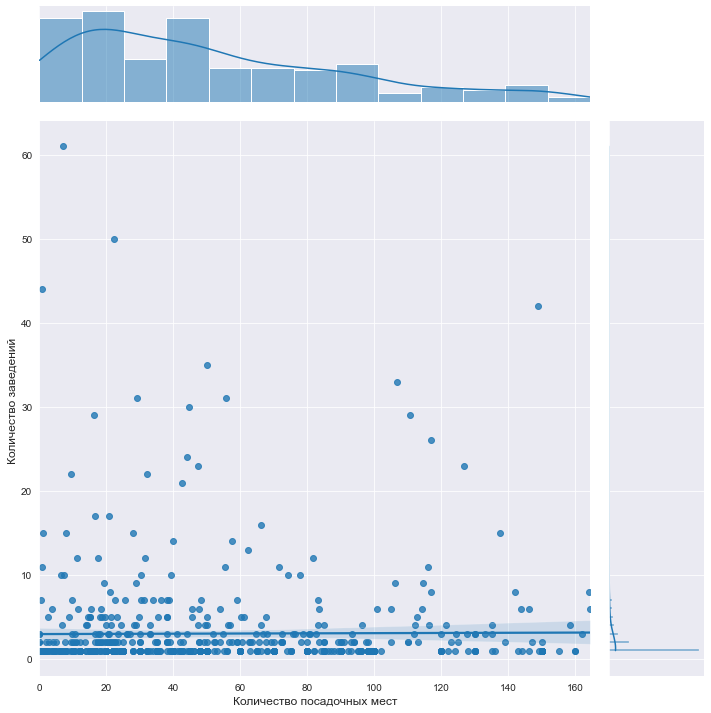

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns 


сhains=df[df['chain']=='да'][['id','object_name','number']].groupby('object_name',as_index=False).agg({'id':'count','number':'mean'}).sort_values(by='id',ascending=False)

сhains.columns=['name','quantity','number']
сhains=сhains.query('quantity< 65 & number < 165')

sns.set_style('darkgrid') 
 
ax=sns.jointplot(x='number',y='quantity',data=сhains, kind='reg' , height=10)
ax.set_axis_labels('Количество посадочных мест' ,"Количество заведений " ,size=12)



In [36]:
cc=сhains.round()
cc.head(10)

,name,quantity,number
629,Суши Wok,61,7.0
473,Папа Джонс,50,22.0
362,Кофе с собой,44,1.0
686,Чайхона №1,42,149.0
676,Хинкальная,35,50.0
712,Якитория,33,107.0
359,Кофе Хаус,31,56.0
192,Додо Пицца,31,29.0
52,Starbucks,30,45.0
57,Subway,29,16.0


In [37]:
print(np.percentile(сhains['quantity'],[90,95,99]))
print(np.percentile(сhains['number'],[90,95,99]))

[ 6. 11. 31.]
[112.84 135.   151.1 ]


 В общей массе сетевые заведения имеют небольшое количество заведений с небольшим количеством посадочных мест( до 100 )

<a id='2.5'></a>
5. Для каждого вида объекта общественного питания опишите среднее количество посадочных мест. Какой вид предоставляет в среднем самое большое количество посадочных мест? Постройте графики.

[150. 214. 300.]


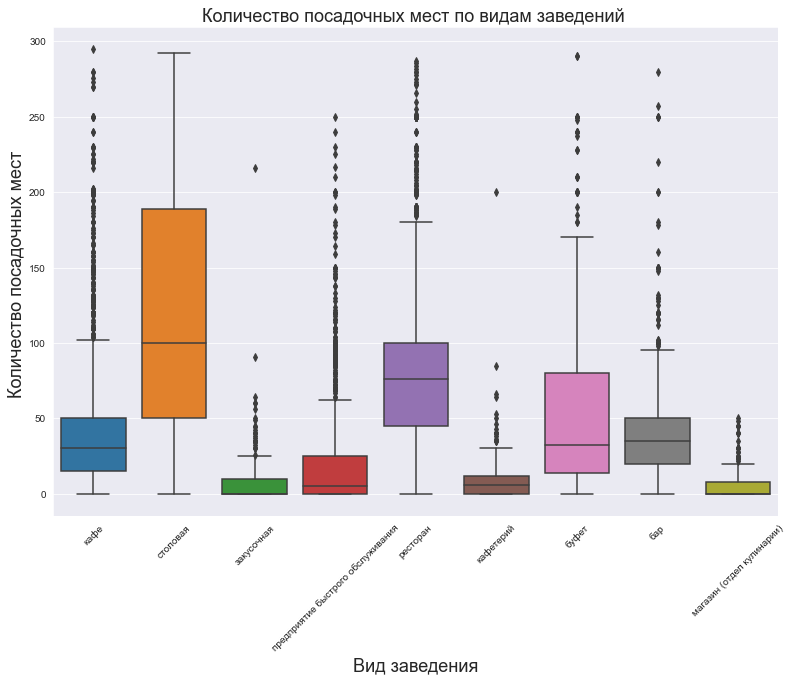

In [38]:
print(np.percentile(df['number'],[90,95,99]))

plt.figure(figsize=(13,9))
limit=df.query('number<300')
num= sns.boxplot(x='object_type',y='number' , data=limit)
num.set_title('Количество посадочных мест по видам заведений ', fontsize=18)
num.set_xlabel('Вид заведения', fontsize=18)
num.set_ylabel('Количество посадочных мест ', fontsize=18)
plt.xticks(rotation=45);



Судя по графику делаем вывод , что в столовых в среднем самое большое количество посадочных мест 

<a id='2.6'></a>
6. Выделите в отдельный столбец информацию об улице из столбца address

In [39]:
pattern='\,((\s[а-яА-Я0-9]+\D+)?\s(улица|переулок|шоссе|проспект|проезд|)(\s[а-яА-Я0-9]+\D+)?)\,'
df['street']=df['address'].str.extract(pat=pattern)[0]
df['street']=df['street'].str.strip(' ')
df.head(30)


,id,object_name,chain,object_type,address,number,street
0,151635,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48,улица Егора Абакумова
1,77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35,улица Талалихина
2,24309,Кафе «Академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95,Абельмановская улица
3,21894,ПИЦЦЕТОРИЯ,да,кафе,"город Москва, Абрамцевская улица, дом 1",40,Абрамцевская улица
4,119365,Кафе «Вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50,Абрамцевская улица
5,27429,СТОЛ. ПРИ ГОУ СОШ № 1051,нет,столовая,"город Москва, Абрамцевская улица, дом 15, корпус 1",240,Абрамцевская улица
6,148815,Брусника,да,кафе,"город Москва, переулок Сивцев Вражек, дом 6/2",10,переулок Сивцев Вражек
7,20957,Буфет МТУСИ,нет,столовая,"город Москва, Авиамоторная улица, дом 8, строение 1",90,Авиамоторная улица
8,20958,КПФ СЕМЬЯ-1,нет,столовая,"город Москва, Авиамоторная улица, дом 8, строение 1",150,Авиамоторная улица
9,28858,Столовая МТУСИ,нет,столовая,"город Москва, Авиамоторная улица, дом 8, строение 1",120,Авиамоторная улица


<a id='2.7'></a>
7. Постройте график топ-10 улиц по количеству объектов общественного питания. Воспользуйтесь внешней информацией и ответьте на вопрос — в каких районах Москвы находятся эти улицы?

In [40]:
popular_street=df.groupby('street',as_index=False)['id'].count().rename(columns={'id':'quantity'}).sort_values(by='quantity',ascending=False)
top10=popular_street.head(10)
street=px.bar(top10,x='street',y='quantity', title='Топ-10 улиц по количеству объектов общественного питания')
street.update_layout(
    xaxis_title='Название Улицы',
    yaxis_title='Количество заведений',
    font=dict(
        size=12,
        color='#325288'
    )

)
street.show()

In [41]:
from io import BytesIO
import requests
#spreadsheet_id = '1hwZgal8MUWvHgtIVStA3771IO_V2qN9p0aO16PzAW-k'  
#file_name = 'https://docs.google.com/spreadsheets/d/{}/export?format=csv'.format(spreadsheet_id)
#r = requests.get(file_name)
#region = pd.read_csv(BytesIO(r.content))
#region


region=pd.read_csv('C:/pra/mosgaz-streets.csv')
region=region.rename(columns={'streetname':'street'})

popular_street
TopTenRegion=popular_street.merge(region, on='street')

TopTenRegion
Top10List=top10['street'].to_list()
Top10List

['проспект Мира',
 'Профсоюзная улица',
 'Ленинградский проспект',
 'Варшавское шоссе',
 'Ленинский проспект',
 'проспект Вернадского',
 'Кутузовский проспект',
 'Каширское шоссе',
 'Кировоградская улица',
 'Ленинградское шоссе']

In [42]:
top10area=TopTenRegion[TopTenRegion['street'].isin(Top10List)]
top10area['area'].value_counts()

Район Тропарево-Никулино           2
Район Теплый Стан                  2
Район Чертаново Южное              2
Ломоносовский район                2
Обручевский район                  2
Район Чертаново Центральное        2
Район Нагатино-Садовники           2
Район Сокол                        2
Район Проспект Вернадского         2
Район Чертаново Северное           2
Район Гагаринский                  2
Донской район                      2
Район Свиблово                     1
Район Левобережный                 1
Хорошевский район                  1
Район Северное Бутово              1
Район Южное Бутово                 1
Район Коньково                     1
Район Аэропорт                     1
Головинский район                  1
Район Марьина роща                 1
Район Якиманка                     1
Район Москворечье-Сабурово         1
Ярославский Район                  1
Алексеевский район                 1
Молжаниновский район               1
Останкинский район                 1
Р

Рассмотрев местоположение самых популярных улиц , проспектов , шоссе , делаем ввывод , что  самыми популярными улицами ,являются главные , оживленные улицы города , находящиеся в самых развитых и густонаселеных районах Москвы.Эти улицы одни из самых протяженых в городе , поэтому захватывают сразу несколько районов города , все районы отражены в таблице выше.


<a id='2.8'></a>
8. Найдите число улиц с одним объектом общественного питания. Воспользуйтесь внешней информацией и ответьте на вопрос — в каких районах Москвы находятся эти улицы?

In [43]:
singleRestStreet=TopTenRegion[TopTenRegion['quantity']==1]
singleRestStreet['street'].drop_duplicates().shape


(478,)

In [44]:
singleRestStreet['area'].value_counts().head(10)

Район Хамовники        25
Басманный район        24
Таганский район        21
Район Марьина роща     18
Тверской район         18
Пресненский район      17
Район Арбат            17
Мещанский район        16
Район Замоскворечье    14
Район Лефортово        12
Name: area, dtype: int64

Количество улиц с 1 объектом общественного питания. Улицы расположены хаотично , есть как ближе к центру , так и улицы в спальных районах , главным фактором , влияющим на малое количество заведений общестевеного питания , как мне кажется , является длина улицы , улицы  , которые находятся в топ 10 по количесвту заведений ,также одни из самых больших по протяженности в Москве , улице же с 1 объеком общественного питания довольно небольшие. Например Кутузовский проспект из топ-10 улиц по протяженности составляет  -8,3 км , а улица Степана Шутова всего 462 метра .

<a id='2.9'></a>
9. Посмотрите на распределение количества посадочных мест для улиц с большим количеством объектов общественного питания. Какие закономерности можно выявить?

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Варшавское шоссе'),
  Text(1, 0, 'проспект Вернадского'),
  Text(2, 0, 'Кутузовский проспект'),
  Text(3, 0, 'Каширское шоссе'),
  Text(4, 0, 'Кировоградская улица'),
  Text(5, 0, 'Ленинградский проспект'),
  Text(6, 0, 'Ленинградское шоссе'),
  Text(7, 0, 'Ленинский проспект'),
  Text(8, 0, 'проспект Мира'),
  Text(9, 0, 'Профсоюзная улица')])

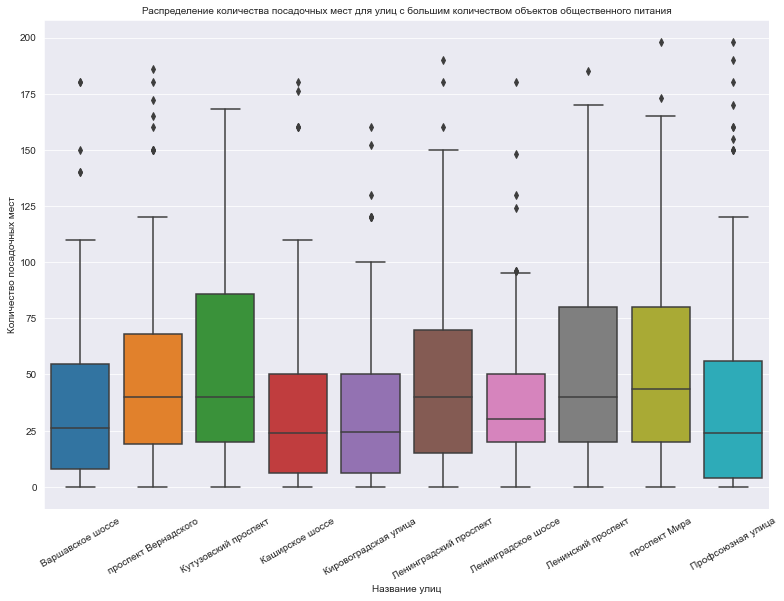

In [45]:
top10street=top10['street'].to_list()

top_street_rest=df[df['street'].isin(top10street)].query('number<200')
plt.figure(figsize=(13,9))
ts=sns.boxplot(x='street' , y='number', data=top_street_rest)

ts.set_title('Распределение количества посадочных мест для улиц с большим количеством объектов общественного питания' , fontsize=10)
ts.set_xlabel('Название улиц', fontsize=10)
ts.set_ylabel('Количество посадочных мест', fontsize=10)

plt.xticks(rotation=30)

Можем сделать ввыдвод , что в среднем  большенство заведений на топ -10 улицах имеют 25-40 посадочных мест 

<a id='2.10'></a>
10. Сделайте общий вывод и дайте рекомендации о виде заведения, количестве посадочных мест, а также районе расположения. Прокомментируйте возможность развития сети.

В результате исследования определили ,что самым популярным форматом заведения является формат "кафе" , для этого формата , среднее количество посадочны мест не больше 50 . Концепция ресторана - обслуживания роботами , поэтому это больше подходит под одиночный и несетевой формат  , так как организацией сетей занимаются большиие кормпании , ориентированые на массового потребителя ,готового платить невысокую цену за продукт. Ресторан с роботами ,явно не подходит для развития сети в одном городе изза своей специфичности и больших вложений на начальном этапе , цена среднего чека явно будет высокой .<br>

Как мы знаем , для завдений общественого питания , ключевым фактором является расположение , поэтому оценив районы , самым  большим количеством одиночных завадений ,делаем вывод ,что раз эти районы являются самыми популярными , значит там сконцентрирован трафик посетителей. Топ-3 локации : Район Хамовники , Басманный район ,Таганский район.  